<center>Computational Statistics, Lena Janys | Summer 2022, Bonn University | 10/05/2022 <br> 
        Xingyu Tao and Ying Sun (Group 14)</center> 

***
    
# <center>Problem Set 03</center>

## Preparation

In [2]:
# Packages
packages <- c(
    "MASS",      # Provides mvrnorm and lda
    "tidyverse", # Collection of packages for data science
    "ggpubr",    # Combined plots
    "cvms"       # Confusion matrix
)

installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
    install.packages(packages[!installed_packages])
}

invisible(lapply(packages, library, character.only = TRUE))

# Seed
set.seed(123)

# Others
theme_set(theme_light())
theme_update(plot.title = element_text(hjust = 0.5))

also installing the dependencies 'ipred', 'recipes'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
ipred   0.9-11 0.9-12              TRUE
recipes 0.1.16  0.2.0             FALSE
cvms     1.2.1  1.3.3             FALSE

  Binaries will be installed
package 'ipred' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LENOVO\AppData\Local\Temp\Rtmpotly6i\downloaded_packages


installing the source packages 'recipes', 'cvms'

Warning message in install.packages(packages[!installed_packages]):
"installation of package 'recipes' had non-zero exit status"Warning message in install.packages(packages[!installed_packages]):
"installation of package 'cvms' had non-zero exit status"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was 

ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'broom' 0.5.2 is already loaded, but >= 0.7.4 is required


## Exercise 1

**Data generating process**

**Class 1:**

* $n_1 = 300$

\begin{align}
    \mathbf{X_1} \sim \mathcal{N} \left( \begin{pmatrix} -3 \\ 3 \end{pmatrix},
    \begin{pmatrix} 16 & -2 \\ -2 & 9 \end{pmatrix} \right)    
\end{align}

**Class 2:**

* $n_2 = 500$

\begin{align}
    \mathbf{X_2} \sim \mathcal{N} \left( \begin{pmatrix} 5 \\ 5 \end{pmatrix},
    \begin{pmatrix} 16 & -2 \\ -2 & 9 \end{pmatrix} \right)    
\end{align}

### 1.a)

In [3]:
n1 <- 300
n2 <- 500
n <- n1 + n2

mu1 <- c(-3, 3)
mu2 <- c(5, 5)
sigma <- matrix(c(16, -2, -2, 9), 2)

In [4]:
sim_fun <- function(n1, n2, mu1, mu2, sigma1, sigma2) {
    
    class <- factor(c(rep(1, n1), rep(2, n2)))
    
    X1 <- mvrnorm(n1, mu1, sigma1)
    X2 <- mvrnorm(n2, mu2, sigma2)
    
    df <- data.frame(class, rbind(X1, X2))
    
}

In [5]:
train_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma)

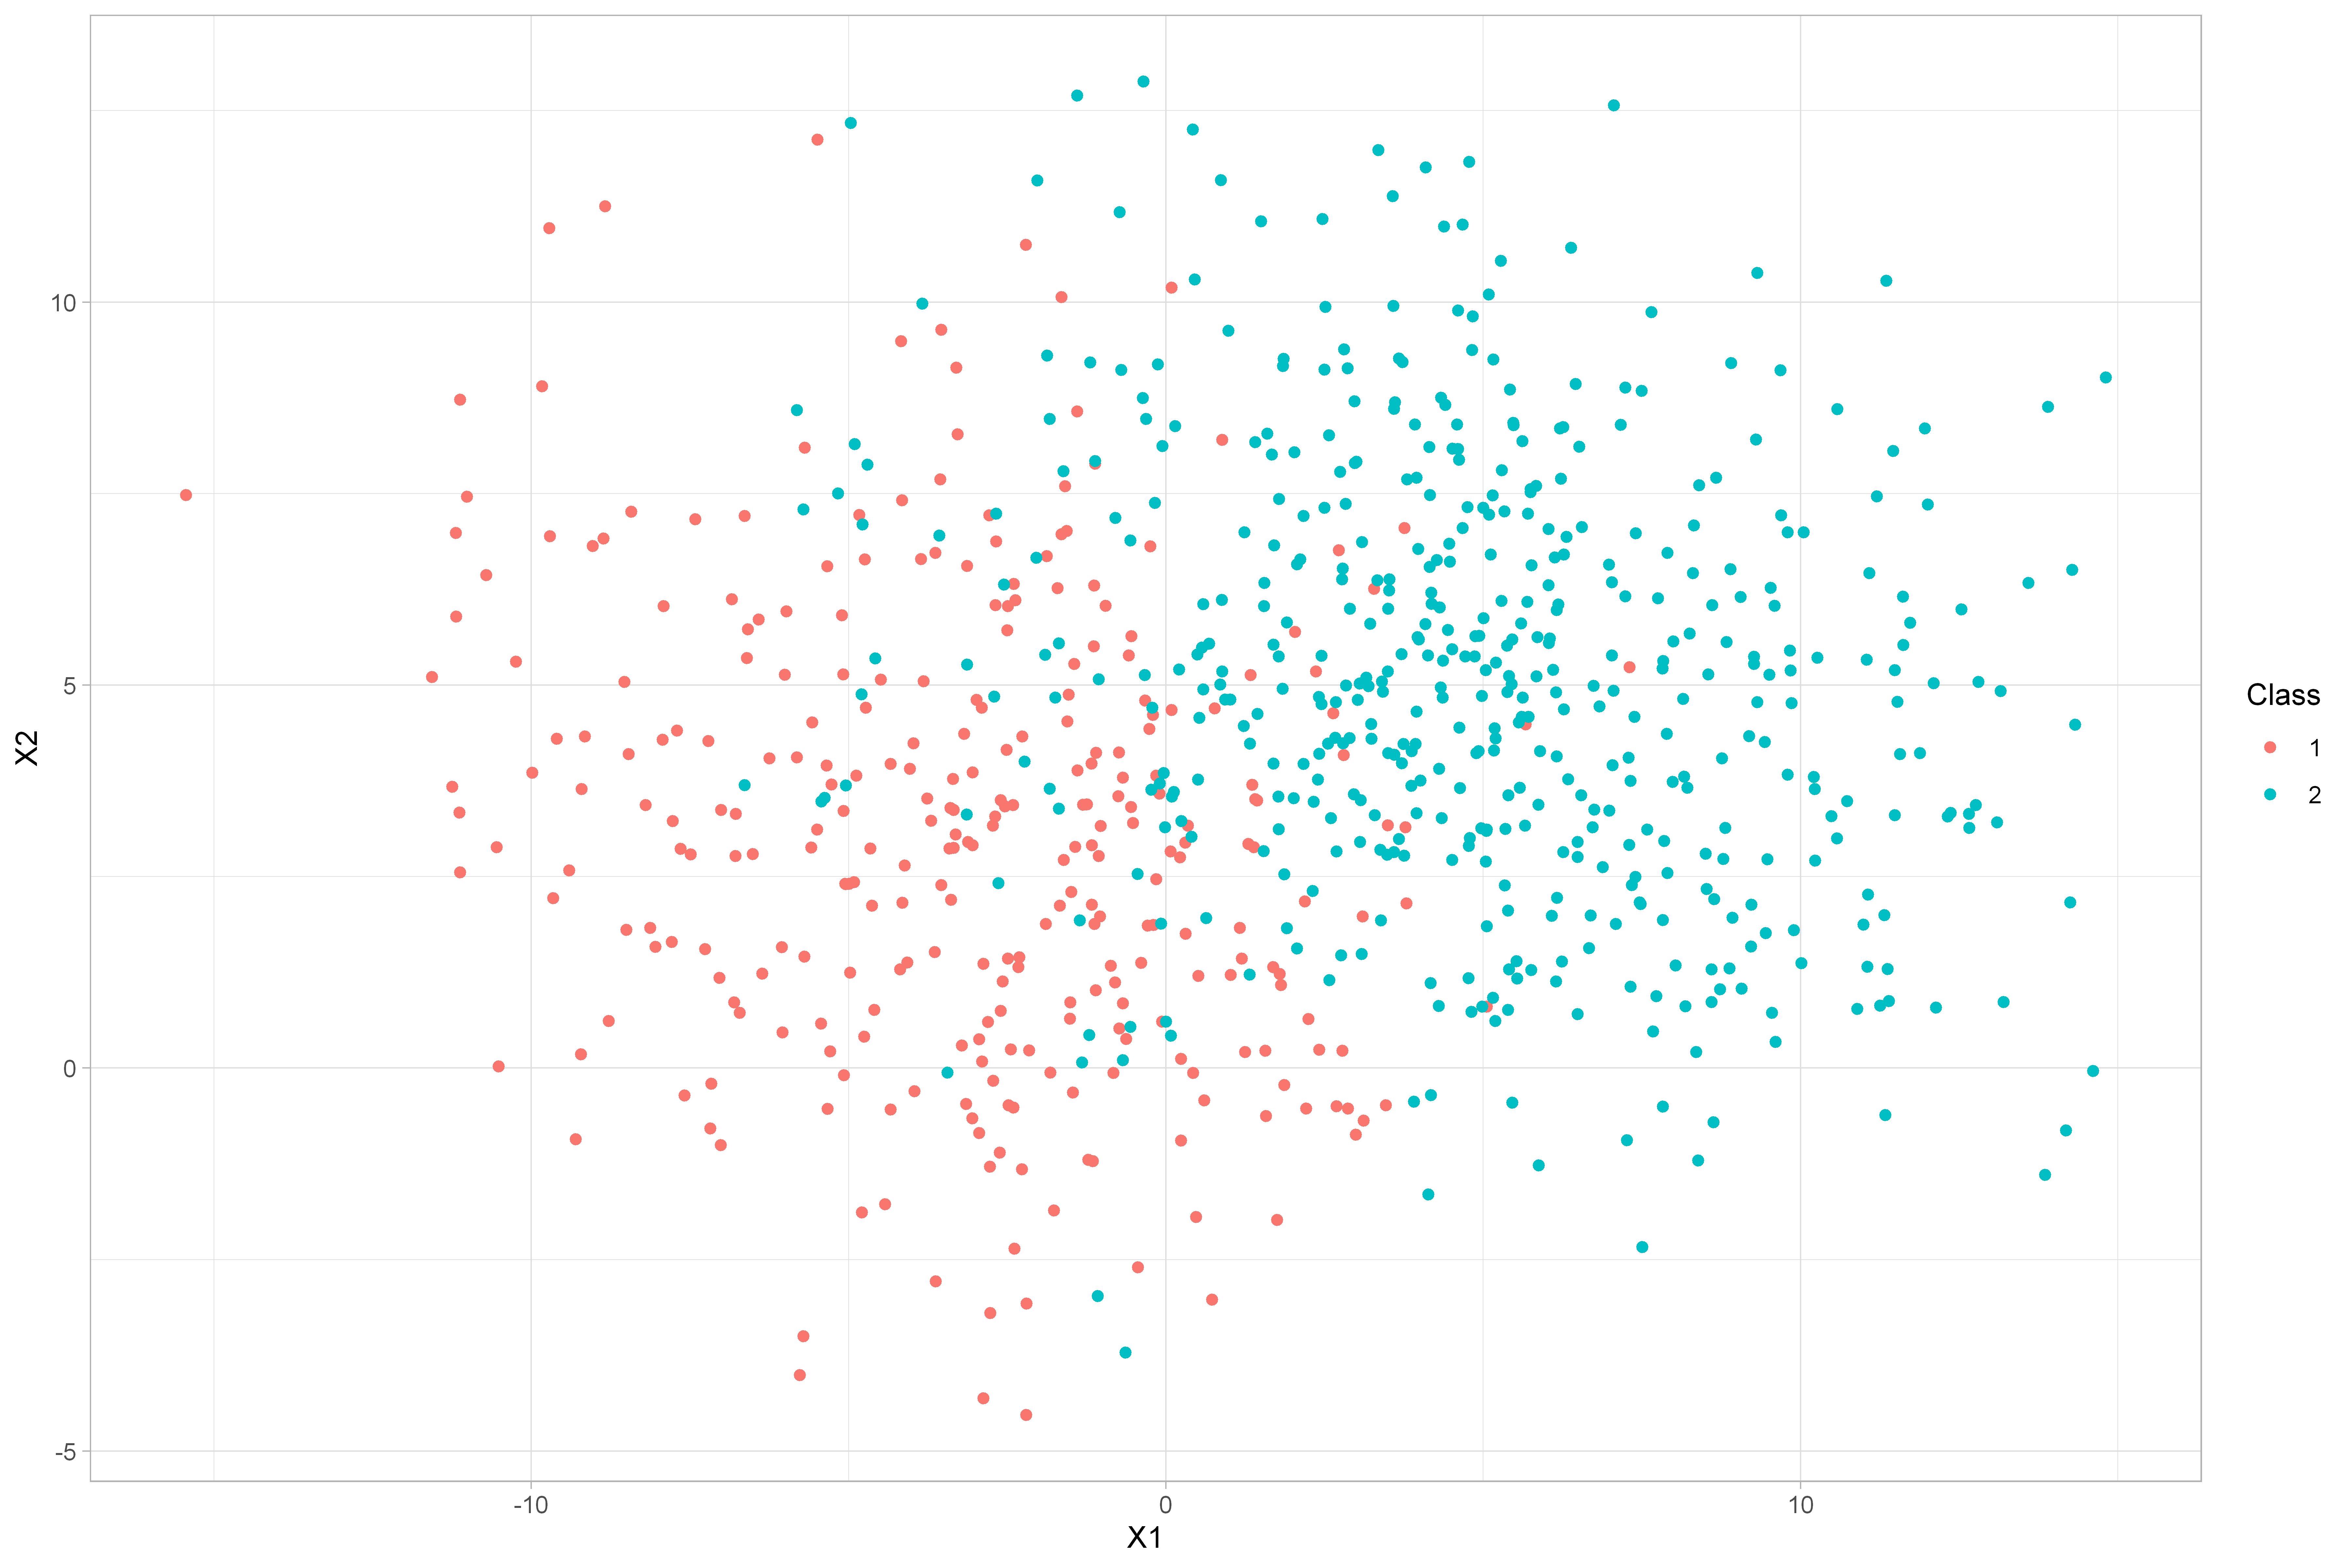

In [30]:
options(repr.plot.res = 600, repr.plot.height = 8, repr.plot.width = 12) # Adjusting plotting options

p1 <- ggplot(train_data, aes(X1, X2, color = class)) +
          geom_point() +
          scale_colour_discrete("Class", c("1", "2"))
p1

### 1.b)

**LDA:**

In [6]:
fit_train_lda <- lda(class ~ X1 + X2, data = train_data)
fit_train_lda

Call:
lda(class ~ X1 + X2, data = train_data)

Prior probabilities of groups:
    1     2 
0.375 0.625 

Group means:
         X1       X2
1 -3.118179 3.511850
2  4.863618 5.152383

Coefficients of linear discriminants:
         LD1
X1 0.2471979
X2 0.1632992

In [7]:
pred_train_lda <- predict(fit_train_lda, newdata = train_data)

Predicted classes:

In [8]:
head(pred_train_lda$class, 10)

[1] 1 1 1 1 1 2 1 1 1 2
Levels: 1 2

Posterior probabilities:

In [9]:
head(pred_train_lda$posterior, 10)

1,2
0.99485713,0.0051428678
0.77352178,0.2264782176
0.92228862,0.0777113827
0.99406159,0.0059384070
0.95088479,0.0491152086
0.17336225,0.8266377453
0.89437241,0.1056275899
0.97640248,0.0235975177
0.99968739,0.0003126074
0.04066852,0.9593314836


Discriminant scores:

In [10]:
head(pred_train_lda$x, 10)

LD1
-2.8574823
-1.0561804
-1.6119867
-2.7929436
-1.8303588
0.1889387
-1.4613144
-2.1692770
-4.1092829
0.9023760


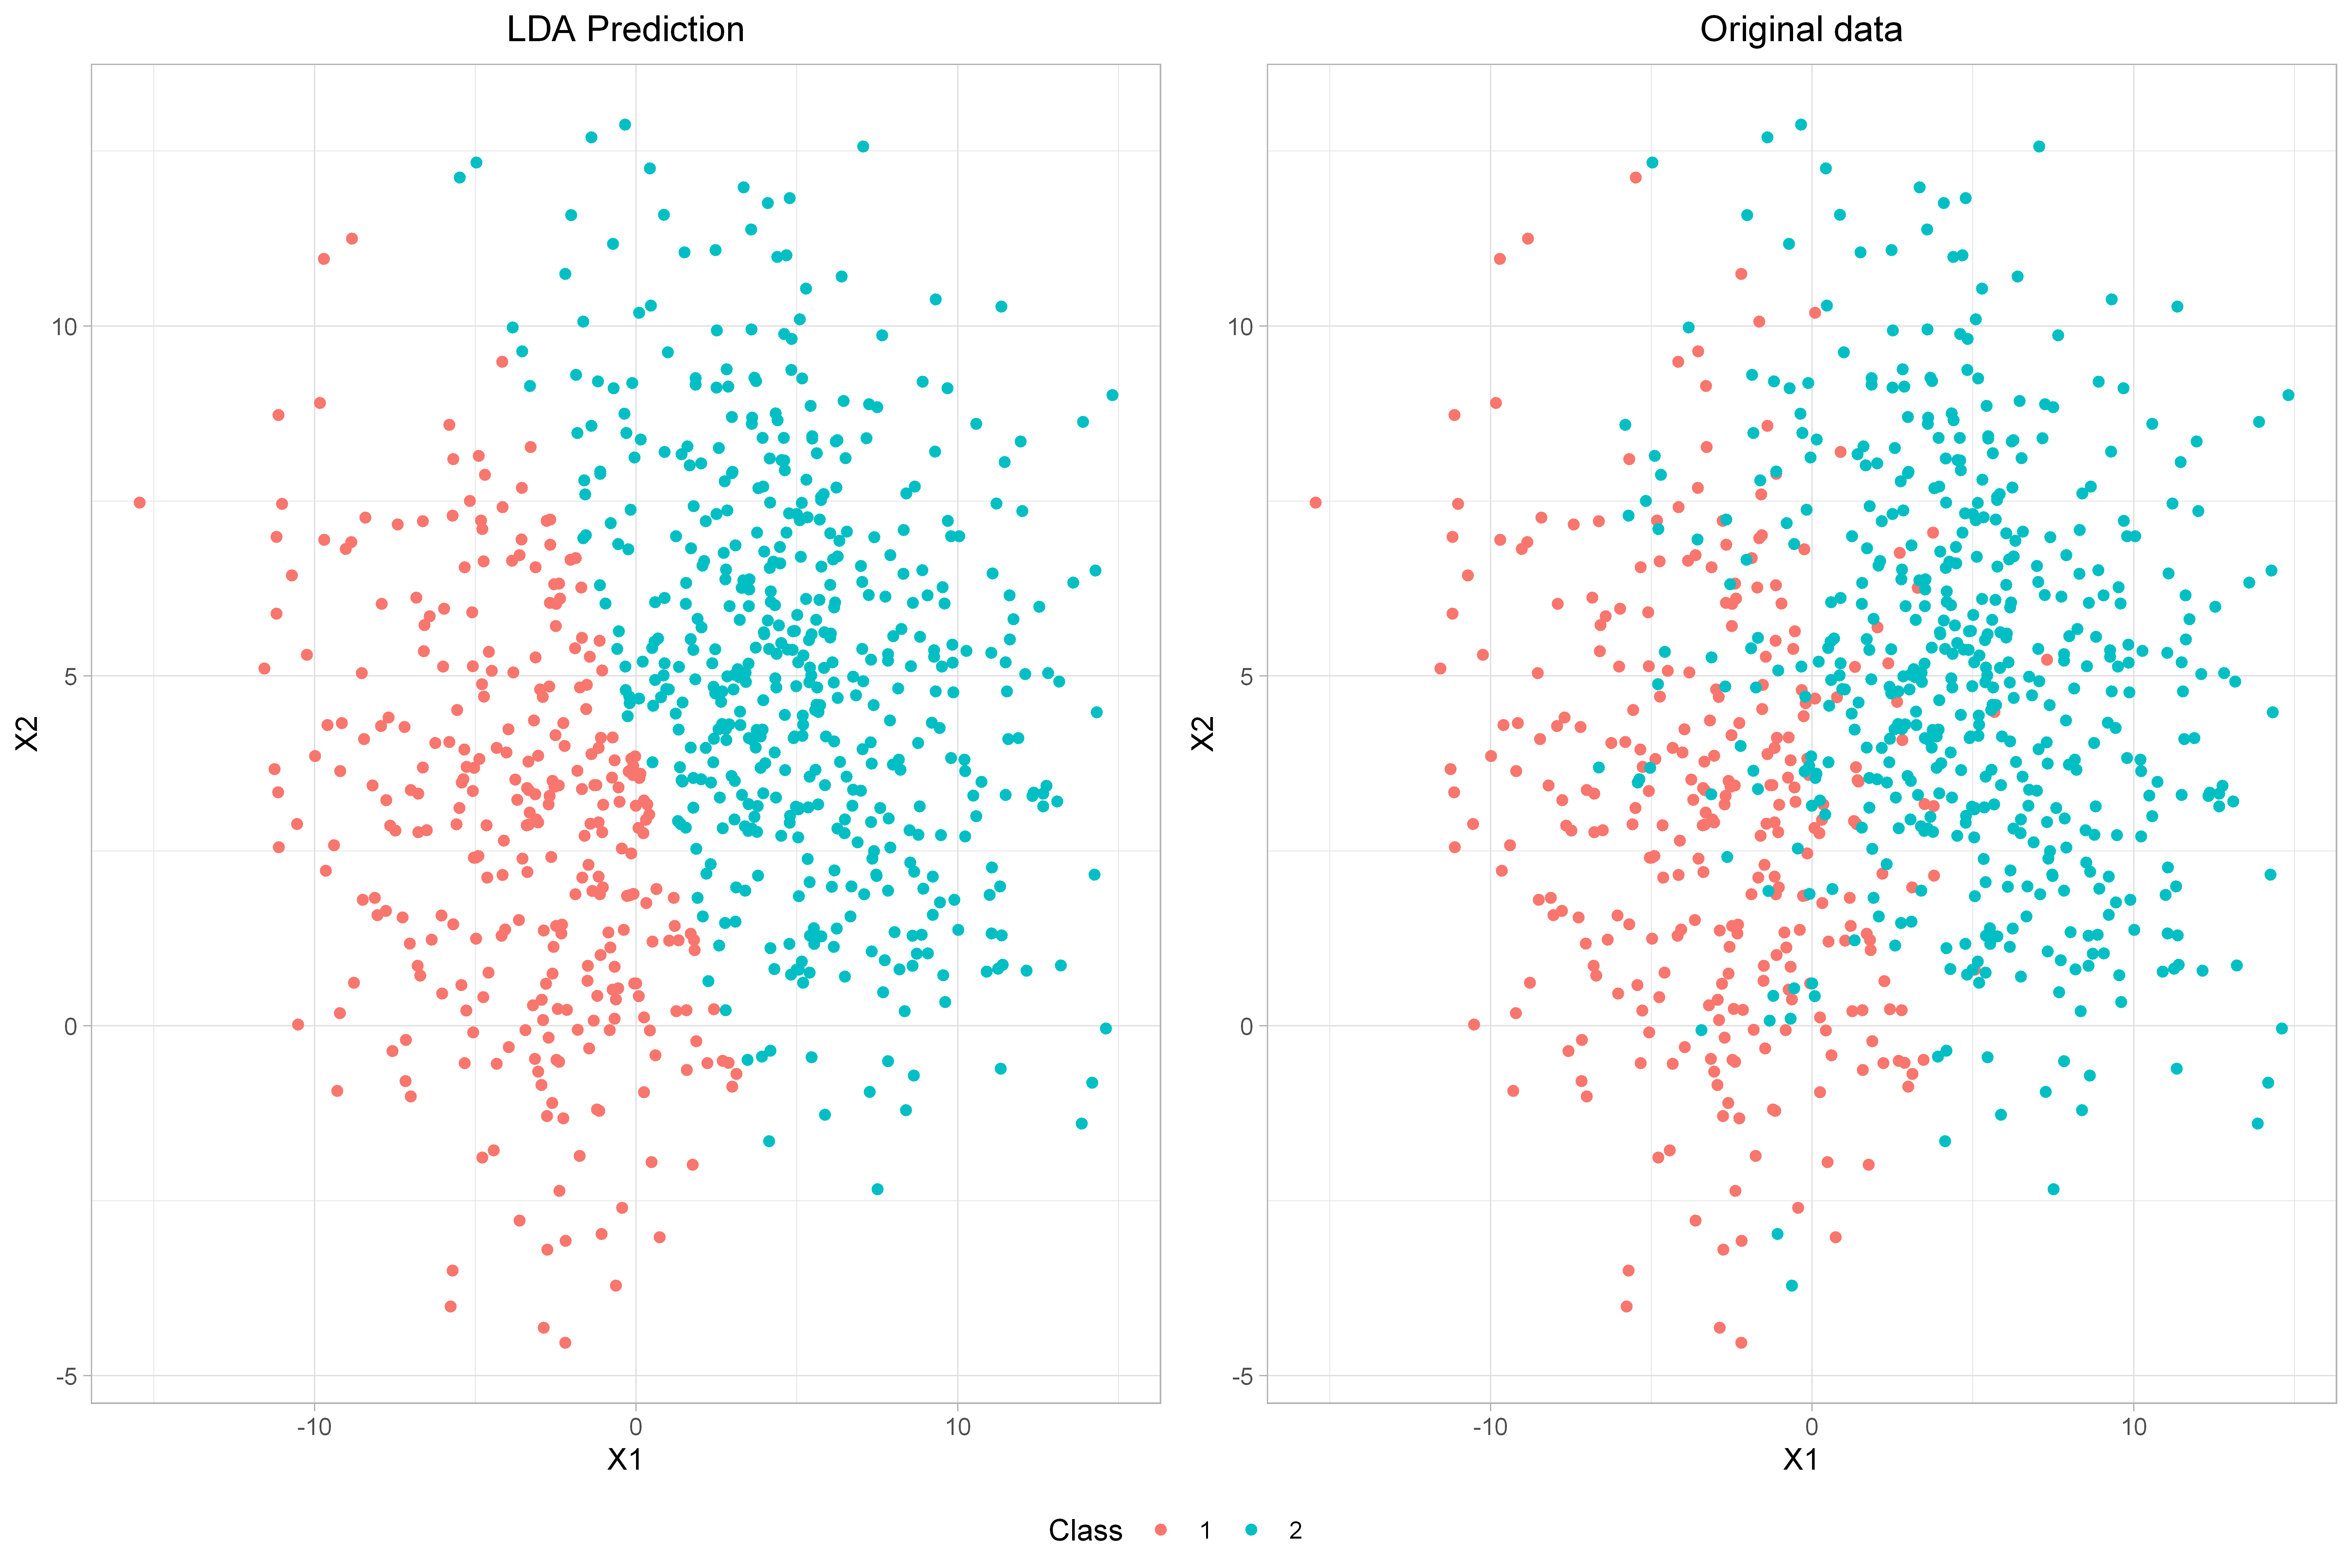

In [36]:
p2 <- ggplot(train_data, aes(X1, X2, color = pred_train_lda$class)) +
          geom_point() +
          scale_colour_discrete("Class", c("1", "2")) +
          ggtitle("LDA Prediction")

p1 <- p1 + ggtitle("Original data")

ggarrange(p2, p1, common.legend = TRUE, legend = "bottom")

**Logistic regression:**

In [11]:
fit_train_logit <- glm(class ~ X1 + X2, data = train_data, family = "binomial")
fit_train_logit


Call:  glm(formula = class ~ X1 + X2, family = "binomial", data = train_data)

Coefficients:
(Intercept)           X1           X2  
    -1.7516       0.5855       0.4080  

Degrees of Freedom: 799 Total (i.e. Null);  797 Residual
Null Deviance:	    1059 
Residual Deviance: 456.1 	AIC: 462.1

In [12]:
pred_train_logit <- predict(fit_train_logit, newdata = train_data, type = "response")
head(pred_train_logit, 10)

1            2            3            4            5            6 
0.0031129386 0.2072306904 0.0675636542 0.0040815490 0.0409413134 0.8355496487 
           7            8            9           10 
0.0961058963 0.0172507276 0.0001776754 0.9653065618

Predicted classes:

In [13]:
pred_train_logit_class <- factor(ifelse(pred_train_logit > 0.5, 2, 1)) # Threshold of 0.5
head(pred_train_logit_class, 10)

1  2  3  4  5  6  7  8  9 10 
 1  1  1  1  1  2  1  1  1  2 
Levels: 1 2

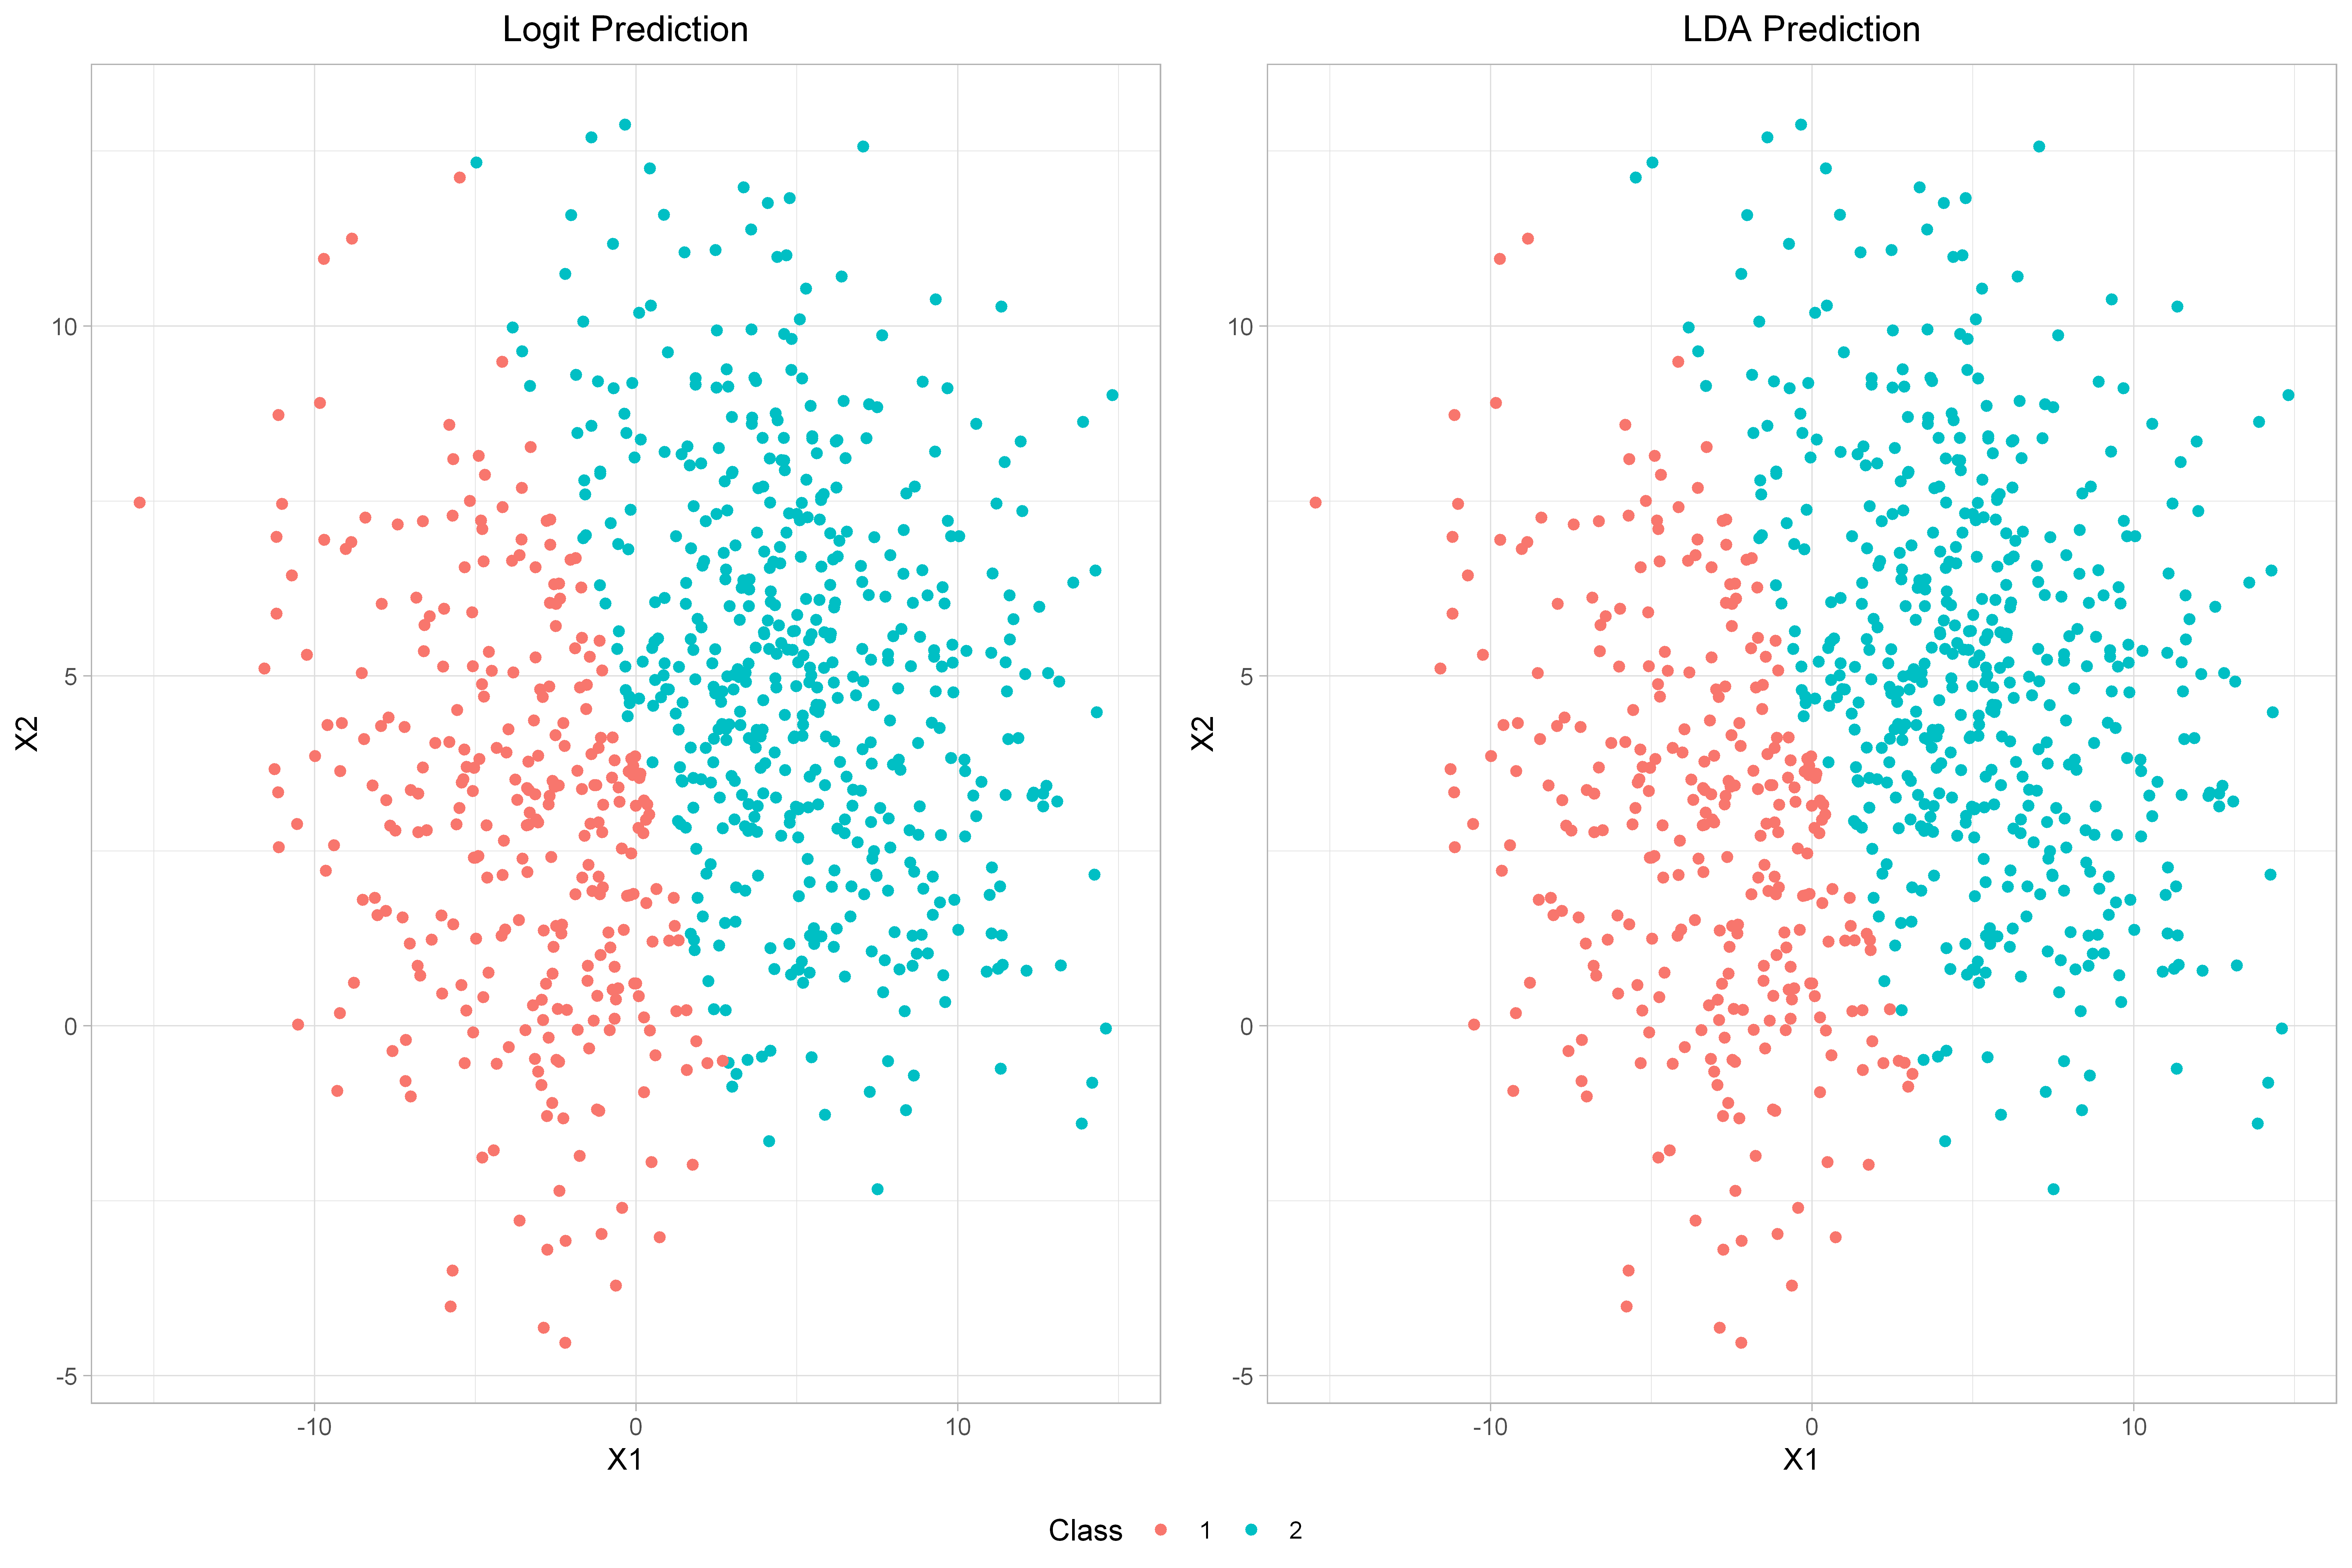

In [40]:
p3 <- ggplot(train_data, aes(X1, X2, color = pred_train_logit_class)) +
          geom_point() +
          scale_color_discrete("Class", c("1", "2")) +
          ggtitle("Logit Prediction")

ggarrange(p3, p2, common.legend = TRUE, legend = "bottom")

### 1.c)

In [14]:
APE <- function(actual, predicted) {
    
    mean(actual != predicted)
    
}

In [15]:
APE_train_lda <- APE(train_data$class, pred_train_lda$class)
APE_train_logit <- APE(train_data$class, pred_train_logit_class)
paste("Mean training error of LDA:", APE_train_lda)
paste("Mean training error of logistic regression:", APE_train_logit)

[1] "Mean training error of LDA: 0.1325"

[1] "Mean training error of logistic regression: 0.1325"

In [16]:
test_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma)

pred_test_lda <- predict(fit_train_lda, newdata = test_data)

pred_test_logit <- predict(fit_train_logit, newdata = test_data, type = "response")
pred_test_logit_class <- factor(ifelse(pred_test_logit > 0.5, 2, 1))

APE_test_lda <- APE(test_data$class, pred_test_lda$class)
APE_test_logit <- APE(test_data$class, pred_test_logit_class)
paste("Mean test error of LDA:", APE_test_lda)
paste("Mean test error of logistic regression:", APE_test_logit)

[1] "Mean test error of LDA: 0.1075"

[1] "Mean test error of logistic regression: 0.10625"

**Comparison:**

The methods perform nearly similarly for the given DGP (both create linear decision boundaries).

### 1.d)

Other performance dimension: Within-class error rates.
 
     - Sensitivity (true positive).
     - Specificity (true negative).

In [17]:
confusion_matrix_train_lda <- table(actual = train_data$class, predicted = pred_train_lda$class)
confusion_matrix_train_logit <- table(actual = train_data$class, predicted = pred_train_logit_class)

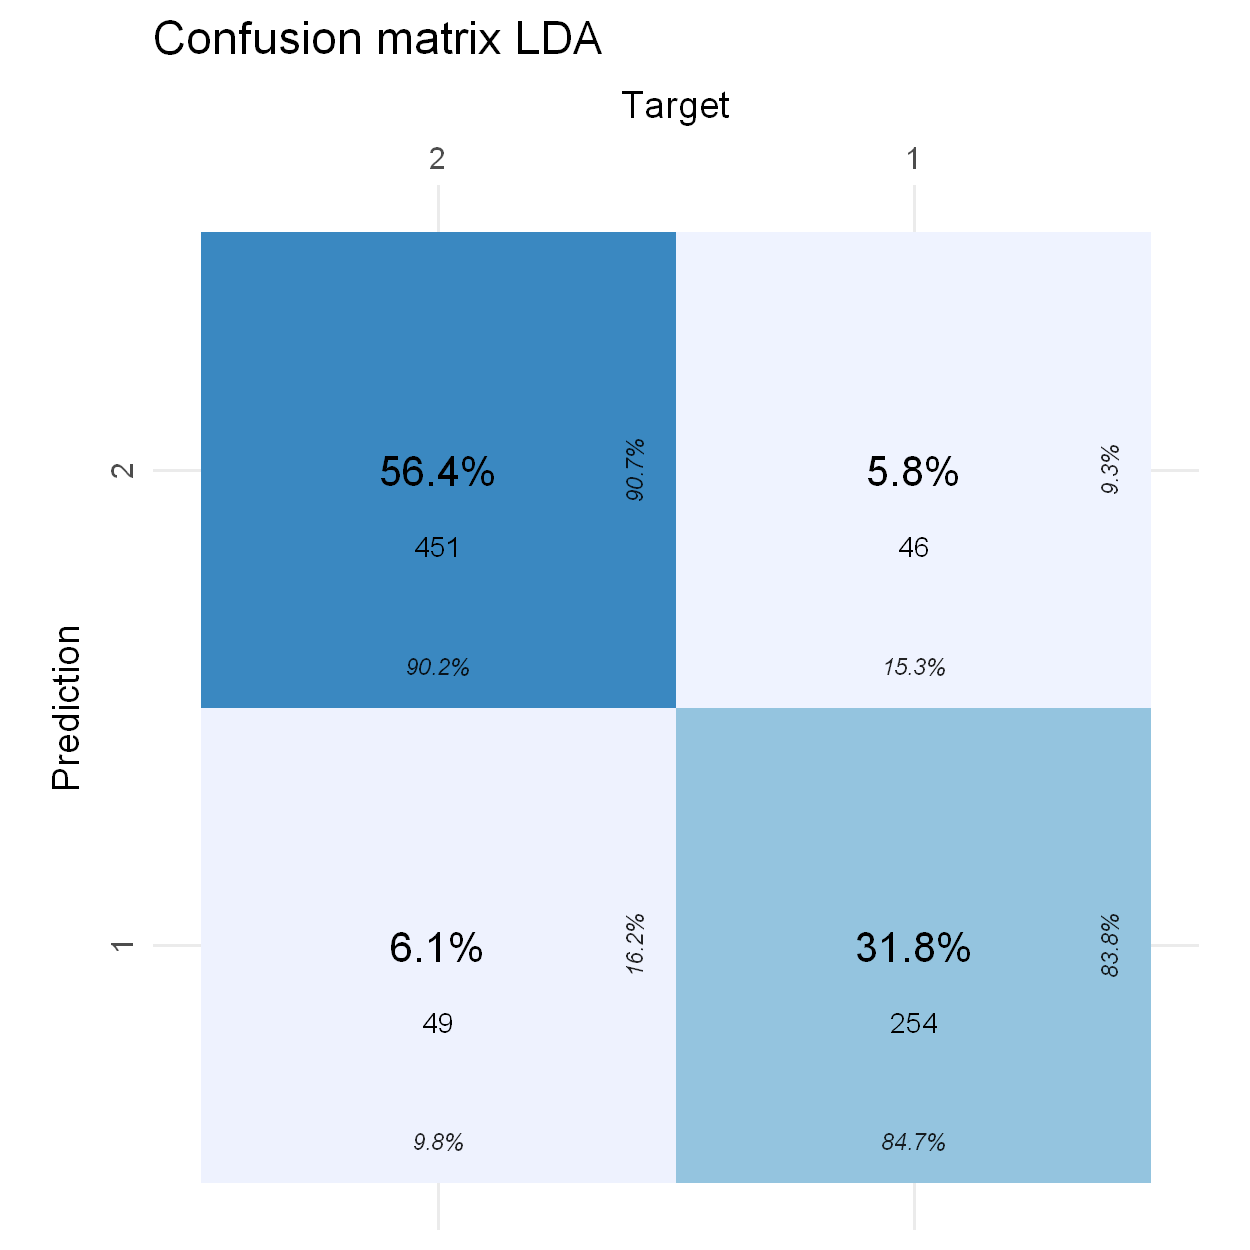

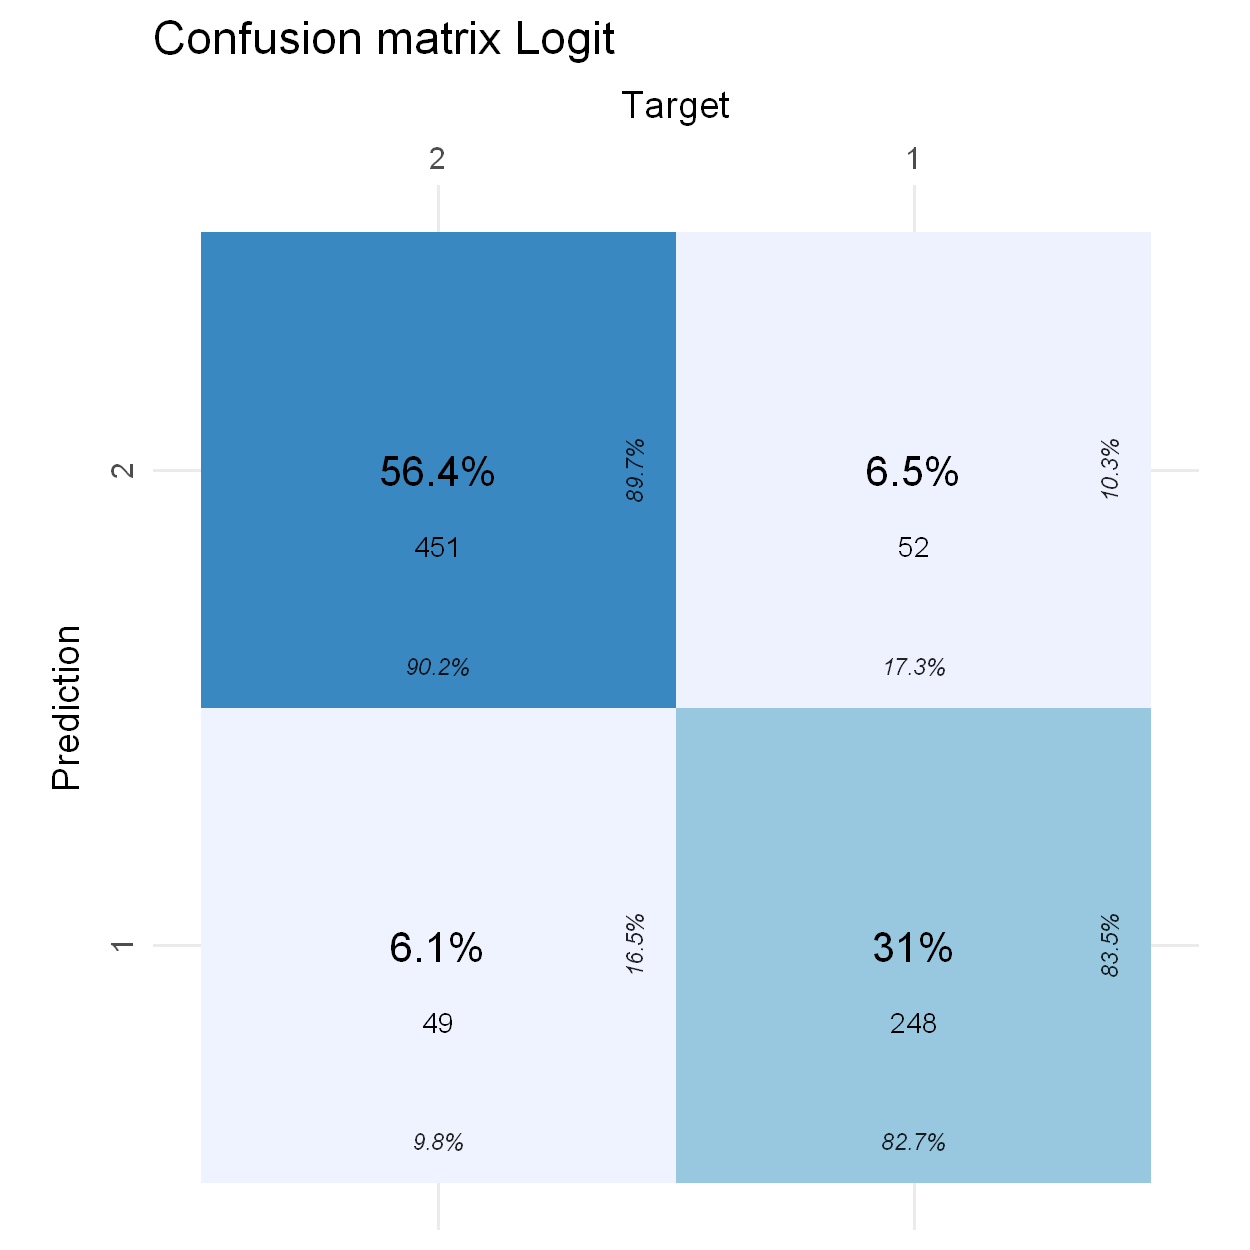

In [45]:
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 5) # Adjusting plotting options

suppressWarnings(
plot_confusion_matrix(as_tibble(confusion_matrix_train_lda), 
                      target_col = "actual", 
                      prediction_col = "predicted",
                      counts_col = "n") +
    ggtitle("Confusion matrix LDA")
)

suppressWarnings(
plot_confusion_matrix(as_tibble(confusion_matrix_train_logit), 
                      target_col = "actual", 
                      prediction_col = "predicted",
                      counts_col = "n") +
    ggtitle("Confusion matrix Logit")
)

If we think of class 2 as "positive", we can see from the above confusion matrices that:

|             |  LDA  | Logit |
|-------------|:-----:|:-----:|
| Sensitivity | 90.2% | 90.2% |
| Specificity | 84.7% | 82.7% |

## Exercise 2 (Simulation Study)

### 2.a)

In [18]:
rep <- 100

APE_train_lda <- rep(NA, rep)
APE_train_logit <- rep(NA, rep)
APE_test_lda <- rep(NA, rep)
APE_test_logit <- rep(NA, rep)

for (i in 1:rep) {
    
    train_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma)
    test_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma)
    
    
    fit_train_lda <- lda(class ~ X1 + X2, data = train_data)
    pred_train_lda <- predict(fit_train_lda, newdata = train_data)
    
    fit_train_logit <- glm(class ~ X1 + X2, data = train_data, family = "binomial")
    pred_train_logit <- predict(fit_train_logit, newdata = train_data, type = "response")
    pred_train_logit_class <- factor(ifelse(pred_train_logit > 0.5, 2, 1))
    
    
    APE_train_lda[i] <- APE(train_data$class, pred_train_lda$class)
    APE_train_logit[i] <- APE(train_data$class, pred_train_logit_class)
    
    
    pred_test_lda <- predict(fit_train_lda, newdata = test_data)
    
    pred_test_logit <- predict(fit_train_logit, newdata = test_data, type = "response")
    pred_test_logit_class <- factor(ifelse(pred_test_logit > 0.5, 2, 1))
    
    
    APE_test_lda[i] <- APE(test_data$class, pred_test_lda$class)
    APE_test_logit[i] <- APE(test_data$class, pred_test_logit_class)
    
}

In [19]:
df_sim <- data.frame(APE = c(APE_train_lda, APE_train_logit, APE_test_lda, APE_test_logit),
                     data = c(rep("train", 2*rep), rep("test", 2*rep)),
                     model = c(rep("lda", rep), rep("logit", rep)))

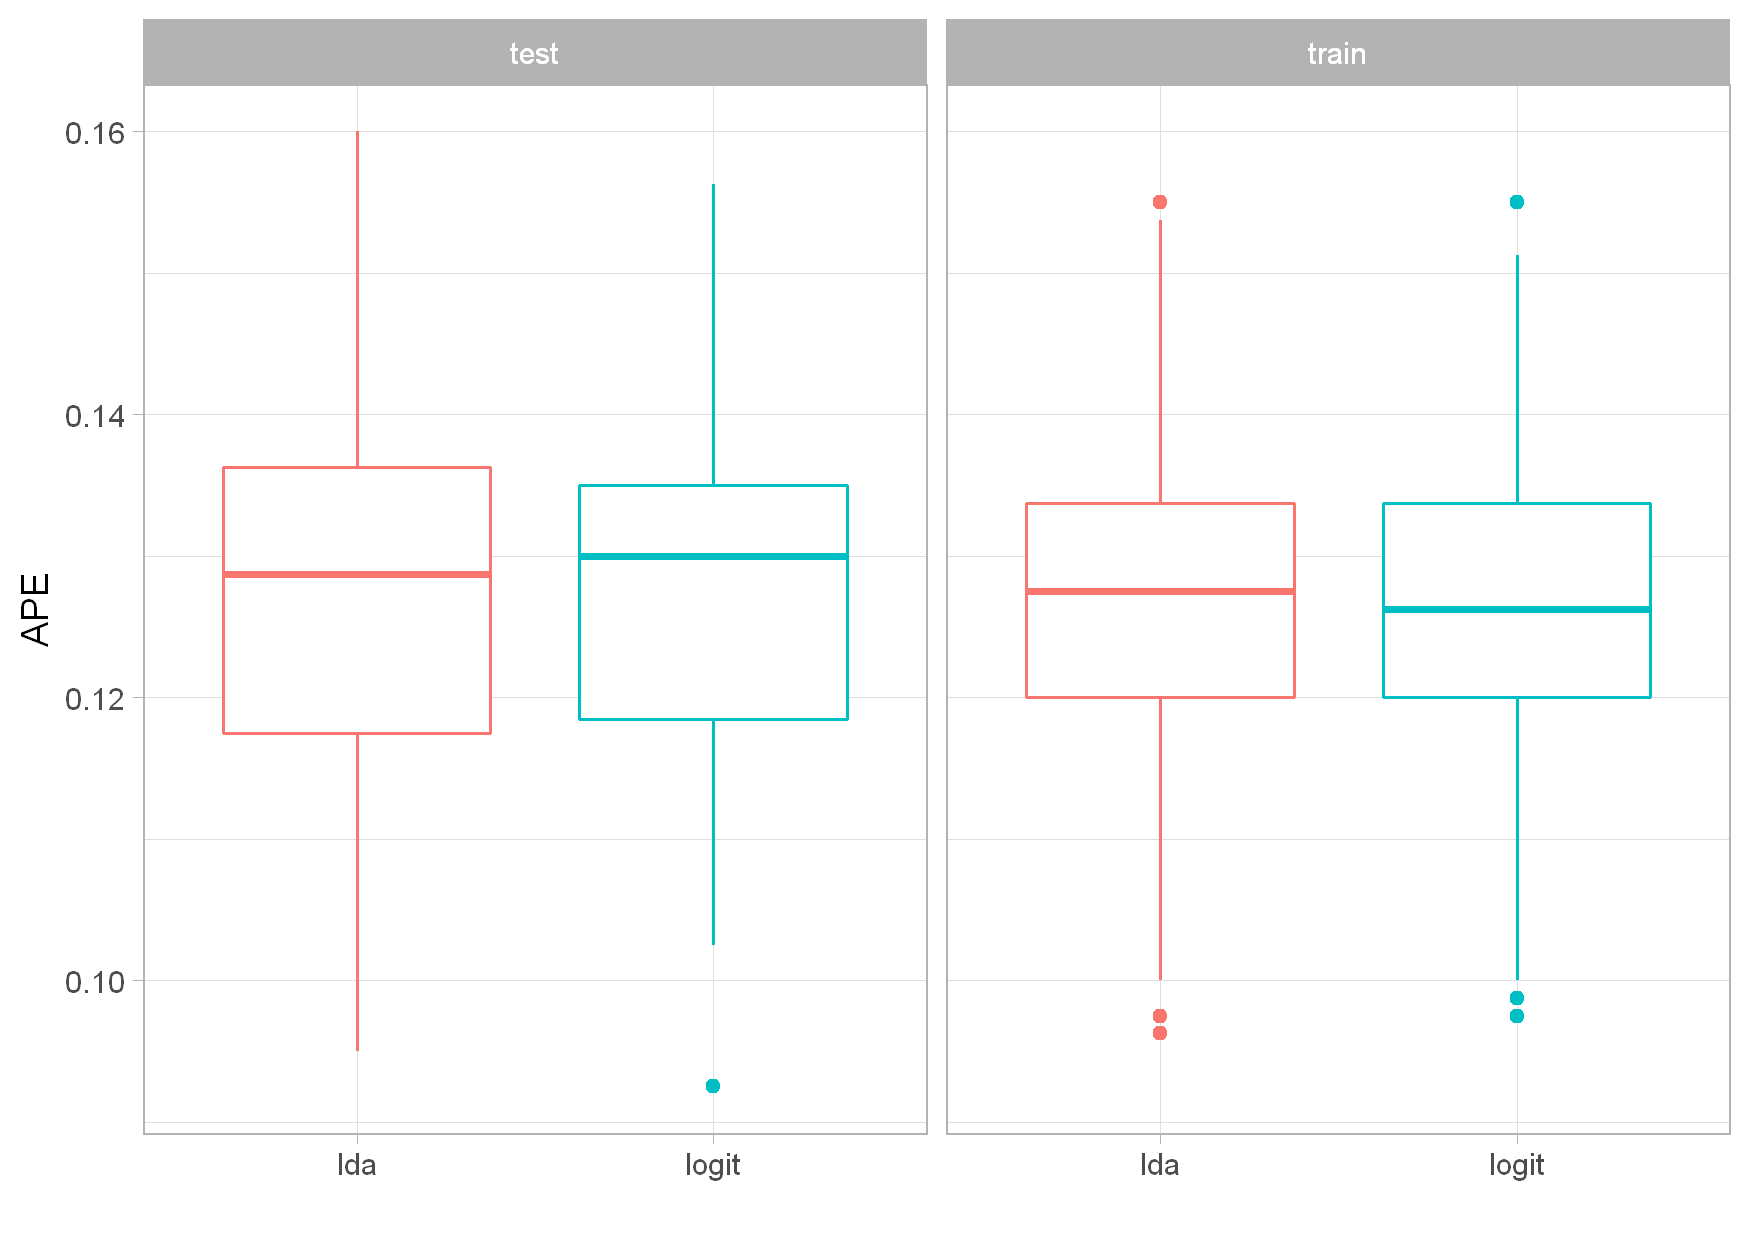

In [48]:
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 7) # Adjusting plotting options

ggplot(df_sim, aes(model, APE, color = model)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "", y = "APE") +
    facet_wrap(vars(data))

**Interpretation:**

Even though all the requirements of LDA are met, there is not really a performance advantage compared to the logistic regression classifier. <br>
While then theoretically the relative efficiency of LDA is superior to logistic regression, in practice there is hardly any difference (e.g., Hastie et al.: *The Elements of Statistical Learning*).

**What other statistic could we consider?**

Again, one could investigate the within-class error rates and measures based thereon (e.g., AUC).

### 2.b)

From the theoretical perspective:

* LDA assumes multivariate normal distribution of covariates, whereas LR does not assume any specific distribution. <br>
  $\quad \rightarrow$ Change distribution, e.g. to multivariate $t$-distribution.
* LDA assumes identical within-class covariance matrices, whereas LR does not. <br>
  $\quad \rightarrow$ Allow the covariance matrices to differ.
* For LDA the classes should have similar size, whereas for LR the class sizes can differ markedly. <br>
  $\quad \rightarrow$ Increase the difference between the two class sizes.
* LDA is quite sensitive to outliers, whereas LR is less sensitive. <br>
  $\quad \rightarrow$ Introduce outliers, e.g. by corrupting class labels.

Overall: Logistic regression has less requirements and is seen as a more robust method.

In [20]:
# Attempt to worsen the relative performance of LDA by allowing the covariance matrices to differ

sigma_adj_factor <- seq(1, 10, by = 0.2)

APE_test_lda <- c()
APE_test_logit <- c()

mean_APE_test_lda <- c()
mean_APE_test_logit <- c()

for (i in 1:length(sigma_adj_factor)) {
    
    sigma2 <- sigma * sigma_adj_factor[i]
    
        for (j in 1:100) {
            
            train_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma2)
            test_data <- sim_fun(n1, n2, mu1, mu2, sigma, sigma2)
            
            fit_train_lda <- lda(class ~ X1 + X2, data = train_data)
            fit_train_logit <- glm(class ~ X1 + X2, data = train_data, family = "binomial")
            
            pred_test_lda <- predict(fit_train_lda, newdata = test_data)
            pred_test_logit <- predict(fit_train_logit, newdata = test_data, type = "response")
            pred_test_logit_class <- factor(ifelse(pred_test_logit > 0.5, 2, 1))
            
            APE_test_lda[j] <- APE(test_data$class, pred_test_lda$class)
            APE_test_logit[j] <- APE(test_data$class, pred_test_logit_class)
            
        }
    
    mean_APE_test_lda[i] <- mean(APE_test_lda)
    mean_APE_test_logit[i] <- mean(APE_test_logit)
    
}

[1]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[16]  4.0  4.2  4.4  4.6  4.8  5.0  5.2  5.4  5.6  5.8  6.0  6.2  6.4  6.6  6.8
[31]  7.0  7.2  7.4  7.6  7.8  8.0  8.2  8.4  8.6  8.8  9.0  9.2  9.4  9.6  9.8
[46] 10.0

[1] 0.1260250 0.1387375 0.1474625 0.1595500 0.1684750 0.1766750 0.1835750
 [8] 0.1914250 0.1999875 0.2044875 0.2114000 0.2153375 0.2220000 0.2242375
[15] 0.2309125 0.2380250 0.2430625 0.2452625 0.2502375 0.2585625 0.2628750
[22] 0.2705750 0.2736375 0.2771500 0.2837625 0.2855625 0.2918625 0.2937125
[29] 0.3003875 0.3071250 0.3081875 0.3104750 0.3202375 0.3234250 0.3249375
[36] 0.3280250 0.3336875 0.3441500 0.3382625 0.3461625 0.3493375 0.3533750
[43] 0.3573000 0.3588875 0.3674500 0.3671625

[1] 0.1260625 0.1394750 0.1480750 0.1601250 0.1703250 0.1785125 0.1852000
 [8] 0.1931375 0.2018750 0.2072375 0.2139750 0.2186875 0.2246750 0.2274000
[15] 0.2339500 0.2413750 0.2460375 0.2481125 0.2527875 0.2608625 0.2653750
[22] 0.2726500 0.2748375 0.2784750 0.2848750 0.2864750 0.2924375 0.2937375
[29] 0.3002250 0.3062750 0.3065750 0.3093625 0.3178750 0.3214750 0.3220875
[36] 0.3247750 0.3300500 0.3401000 0.3348750 0.3417750 0.3452875 0.3490500
[43] 0.3519500 0.3537125 0.3614375 0.3607750

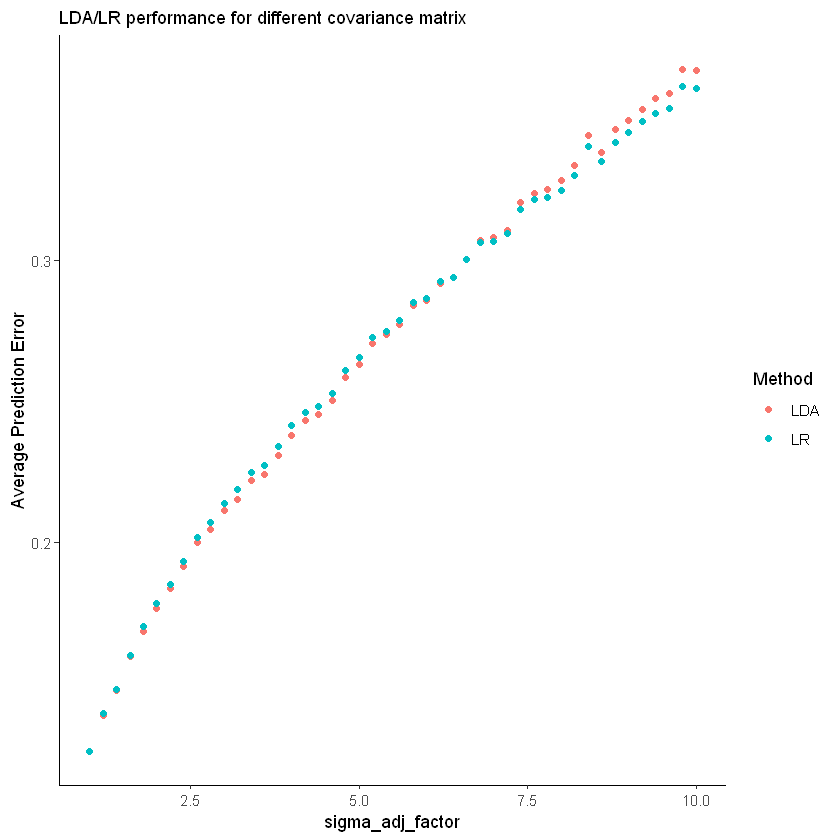

In [76]:
sigma_adj_factor 

test_error1 <- data.frame("size" =sigma_adj_factor, "LDA"= mean_APE_test_lda, "LR" = mean_APE_test_logit)

ggplot(test_error1, aes(x=size)) +
    geom_point(aes(y=mean_APE_test_lda, colour="LDA")) +
    geom_point(aes(y=mean_APE_test_logit, colour="LR")) +
    scale_colour_discrete("Method", c("LDA", "LR")) +
    theme_classic()+
    labs(subtitle="LDA/LR performance for different covariance matrix") +
    xlab("sigma_adj_factor") +
    ylab("Average Prediction Error")

mean_APE_test_lda
mean_APE_test_logit



In [45]:
# Attempt to worsen the relative performance of LDA by allowing the sample size to differ
sample_size_n1 <- seq(50,300,by =50 )
sample_size_n2 <- seq(750,500,by =-50 )

APE_test_lda_2 <- c()
APE_test_logit_2 <- c()

mean_APE_test_lda_2 <- c()
mean_APE_test_logit_2 <- c()

for (i in 1:length(sample_size_n1)) {
    
    sim_samp_n1 <- sample_size_n1[i]
    sim_samp_n2 <- sample_size_n2[i]
    
        for (j in 1:100) {
            
            train_data <- sim_fun(sim_samp_n1, sim_samp_n2, mu1, mu2, sigma, sigma)
            test_data <- sim_fun(sim_samp_n1, sim_samp_n2, mu1, mu2, sigma, sigma)
            
            fit_train_lda <- lda(class ~ X1 + X2, data = train_data)
            fit_train_logit <- glm(class ~ X1 + X2, data = train_data, family = "binomial")
            
            pred_test_lda <- predict(fit_train_lda, newdata = test_data)
            pred_test_logit <- predict(fit_train_logit, newdata = test_data, type = "response")
            pred_test_logit_class <- factor(ifelse(pred_test_logit > 0.5, 2, 1))
            
            APE_test_lda_2[j] <- APE(test_data$class, pred_test_lda$class)
            APE_test_logit_2[j] <- APE(test_data$class, pred_test_logit_class)
            
        }
    
    mean_APE_test_lda_2[i] <- mean(APE_test_lda_2)
    mean_APE_test_logit_2[i] <- mean(APE_test_logit_2)
    
}

mean_APE_test_lda_2
mean_APE_test_logit_2
sample_size <- cbind(sample_size_n1,sample_size_n2)
sample_size

[1] 0.0424750 0.0710375 0.0908500 0.1053250 0.1169625 0.1264750

[1] 0.0426500 0.0709750 0.0909125 0.1059000 0.1168875 0.1266750

sample_size_n1,sample_size_n2
50,750
100,700
150,650
200,600
250,550
300,500


[1] 0.0424750 0.0710375 0.0908500 0.1053250 0.1169625 0.1264750

[1] 0.0426500 0.0709750 0.0909125 0.1059000 0.1168875 0.1266750

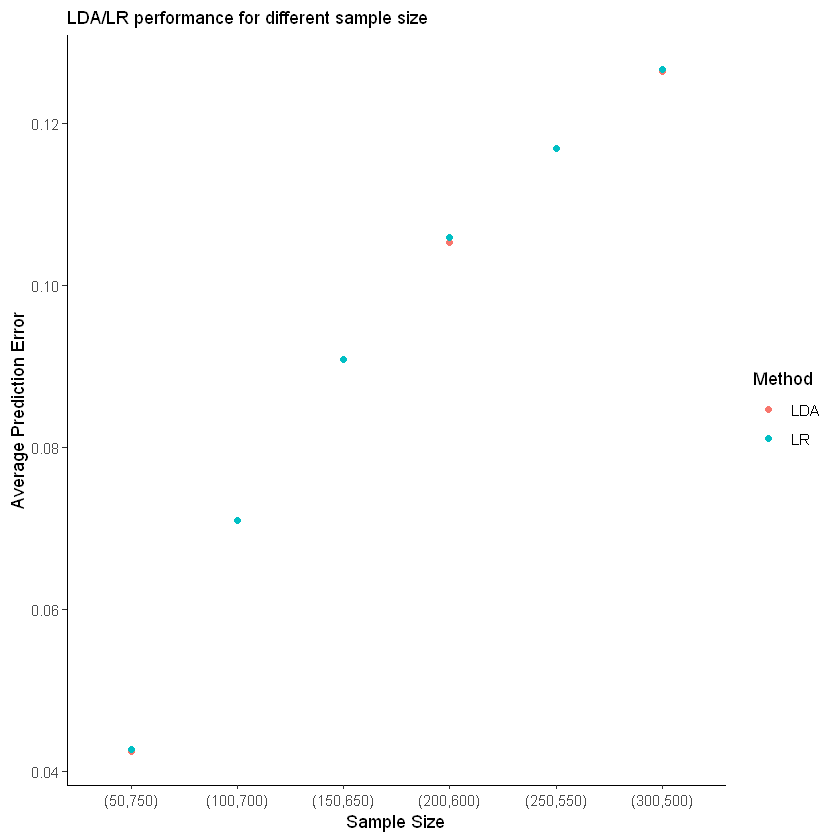

In [77]:
sample_size_2 <- c("(50,750)","(100,700)","(150,650)","(200,600)","(250,550)","(300,500)")
# cbind(sample_size_n1,sample_size_n2)
test_error <- data.frame("size" =sample_size_2, "LDA"= mean_APE_test_lda_2, "LR" = mean_APE_test_logit_2)

ggplot(test_error, aes(x=size)) +
    geom_point(aes(y=LDA, color="LDA")) +
    geom_point(aes(y=LR, color="LR")) +
    scale_colour_discrete("Method", c("LDA", "LR")) +
    theme_classic()+
    labs(subtitle="LDA/LR performance for different sample size") +
    xlab("Sample Size") +
    ylab("Average Prediction Error")+
    scale_x_discrete(limits = unique(test_error$size))

mean_APE_test_lda_2
mean_APE_test_logit_2


### 2.c)

We adjust the threshold (by default = 0.5) that is used to classify the observations.

In [64]:
sensitivity_2 <- c()
specificity_2 <- c()
total_error_2 <- c()

threshold_2 <- seq(from=0.1, to= 0.9, by=0.1)
for (i in 1:length(threshold_2)) {
  
  pred_train_logit_class_2 <- factor(ifelse(pred_test_logit >= threshold_2[i], 2, 1))
  confusion_matrix_train_logit_2 <- table(actual = train_data$class, predicted = pred_train_logit_class_2)
  
  sensitivity_2[i] <- confusion_matrix_train_logit_2[2,2]/ sum(confusion_matrix_train_logit_2[2,])
  specificity_2[i] <- confusion_matrix_train_logit_2[1,1]/ sum(confusion_matrix_train_logit_2[1,])
  total_error_2[i] <- (confusion_matrix_train_logit_2[1,2]+confusion_matrix_train_logit_2[2,1])/(sum(confusion_matrix_train_logit_2[1,])+sum(confusion_matrix_train_logit_2[2,]))
}


[1] 0.988 0.978 0.950 0.928 0.900 0.854 0.810 0.752 0.646

[1] 0.4666667 0.5966667 0.6833333 0.7133333 0.8066667 0.8633333 0.9033333
[8] 0.9500000 0.9733333

[1] 0.20750 0.16500 0.15000 0.15250 0.13500 0.14250 0.15500 0.17375 0.23125

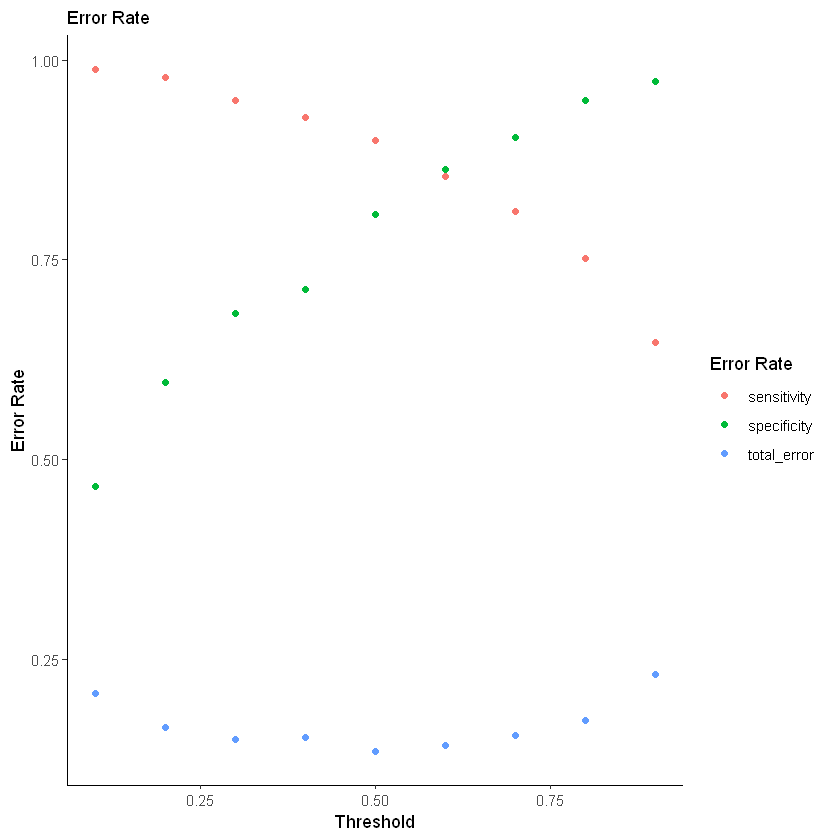

In [72]:
# cbind(sample_size_n1,sample_size_n2)
DATA <- data.frame("threshold" =threshold_2, "sensitivity"= sensitivity_2, "specificity" = specificity_2, "total_error" = total_error_2)

ggplot(DATA, aes(x=threshold)) +
    geom_point(aes(y=sensitivity, color="sensitivity")) +
    geom_point(aes(y=specificity, color="specificity")) +
    geom_point(aes(y=total_error, color="total_error")) +
    scale_colour_discrete("Error Rate", c("sensitivity", "specificity", "total_error")) +
    theme_classic()+
    labs(subtitle="Error Rate") +
    xlab("Threshold") +
    ylab("Error Rate")

sensitivity_2
specificity_2
total_error_2